<a href="https://colab.research.google.com/github/Farazmghm/price-of-laptops/blob/main/laptop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This dataset contains specifications and prices of various laptops, designed for building a machine learning model to predict laptop prices. The goal is to analyze the relationships between hardware features and price, preprocess the data, and implement predictive models using machine learning techniques.

Project Overview
✔ Exploratory Data Analysis (EDA):

Examining different features, detecting outliers, understanding data distribution, and analyzing correlations between variables.

✔ Data Preprocessing:

Converting categorical variables into numerical representations.

Handling outliers and missing data (if present).

Normalizing numerical features for better model performance.

✔ Model Implementation:

Training machine learning models, specifically Random Forest and XGBoost, to predict laptop prices.

✔ Model Evaluation:

Assessing model performance using key evaluation metrics:

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

Coefficient of Determination (R²)

✔ Model Storage:

Saving the trained model for future predictions.

Target Variable
The target variable in this dataset is "Price ($)", representing the predicted laptop price.

High Price: Laptops with a higher price range.

Low Price: Laptops in a lower price range.

This dataset is useful for price estimation models, market analysis, and understanding the impact of hardware specifications on laptop pricing.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/dataset2.csv')

In [4]:
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [5]:
df.shape

(11768, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [7]:

df.isna().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

,0
Brand,10
Processor,8
RAM (GB),5
Storage,5
GPU,7
Screen Size (inch),5
Resolution,4
Battery Life (hours),81
Weight (kg),231
Operating System,4


In [10]:

df.describe()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($)
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


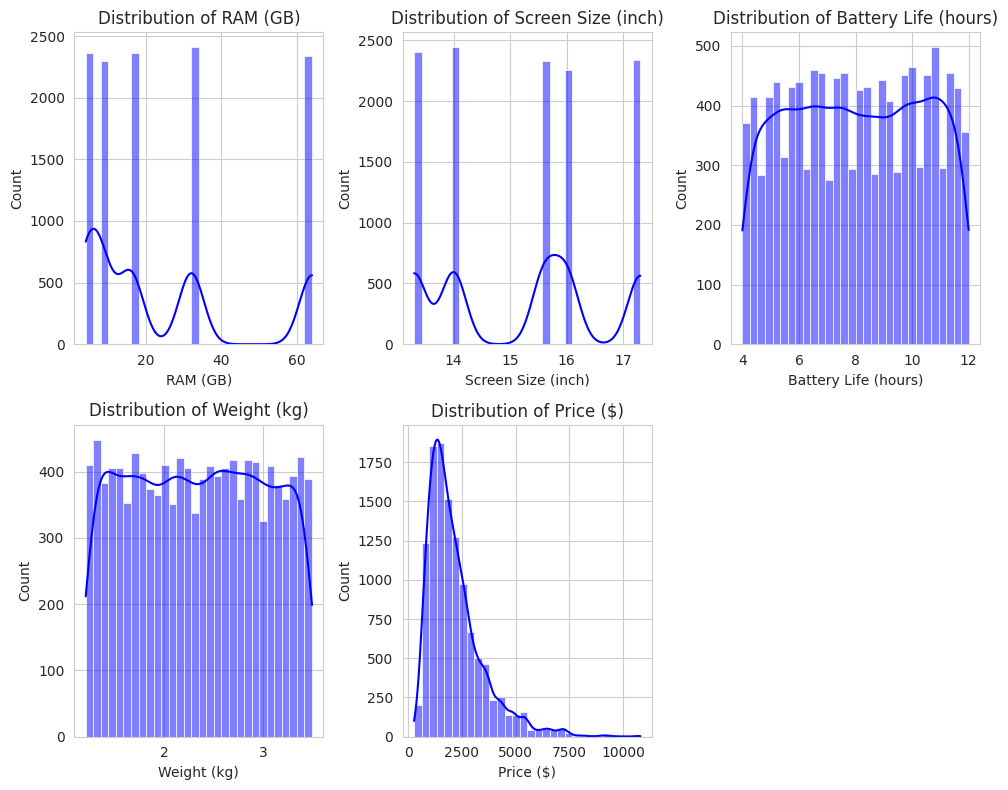

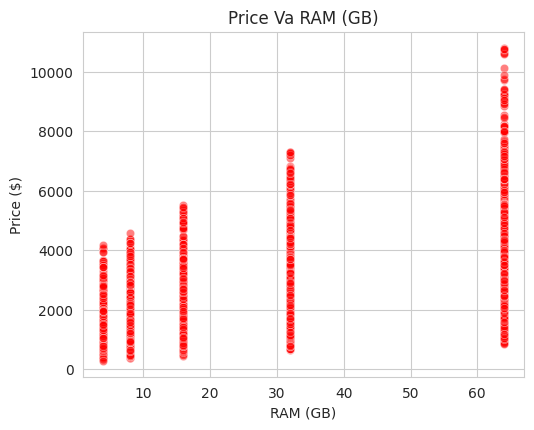

In [11]:
sns.set_style('whitegrid')
numeric=["RAM (GB)", "Screen Size (inch)", "Battery Life (hours)", "Weight (kg)", "Price ($)"]
plt.figure(figsize=(10,8))
for i,col in enumerate(numeric,1):
  plt.subplot(2,3,i)
  sns.histplot(df[col], bins=30, kde=True, color="blue")
  plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#scotter
plt.figure(figsize=(10,8))
for i, col in enumerate(numeric[:1],1):
  plt.subplot(2,2,i)
  sns.scatterplot(x=df[col], y=df["Price ($)"], alpha=0.5, color="red")
  plt.title(f"Price Va {col}")
plt.tight_layout()
plt.show()


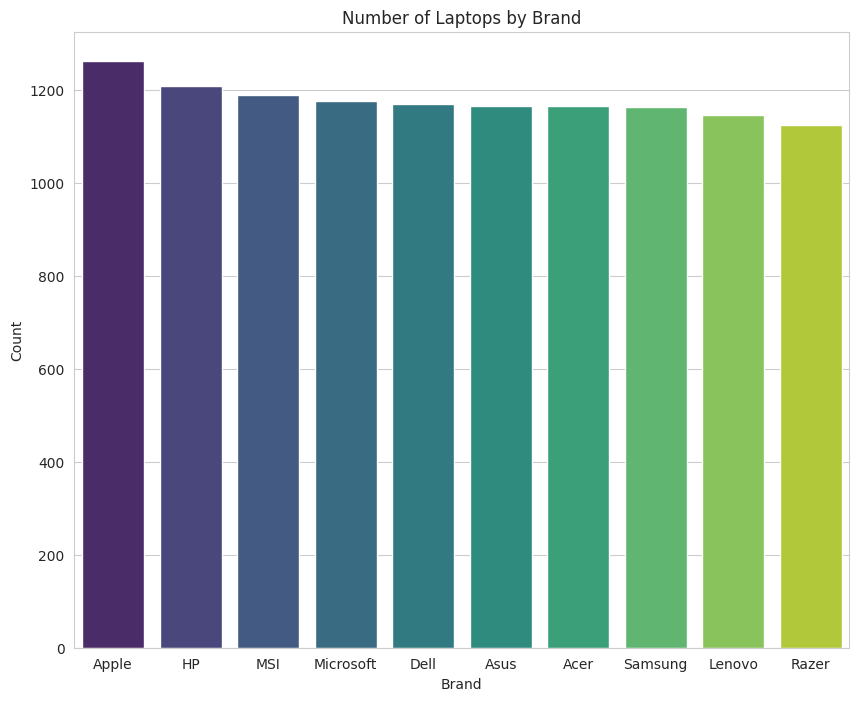

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.countplot(x=df["Brand"], order=df["Brand"].value_counts().index, palette="viridis")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Number of Laptops by Brand")
plt.show()

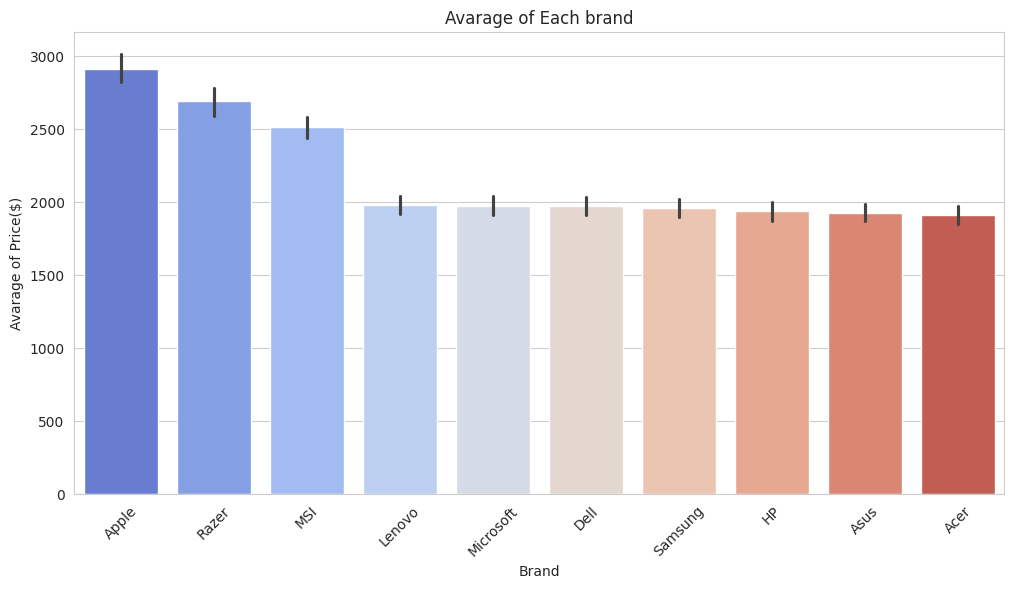

In [13]:
sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x=df["Brand"], y=df["Price ($)"], estimator=lambda x: x.mean(), order=df.groupby("Brand")["Price ($)"].mean().sort_values(ascending=False).index, palette="coolwarm")
plt.xlabel("Brand")
plt.ylabel("Avarage of Price($)")
plt.title("Avarage of Each brand")
plt.xticks(rotation=45)
plt.show()

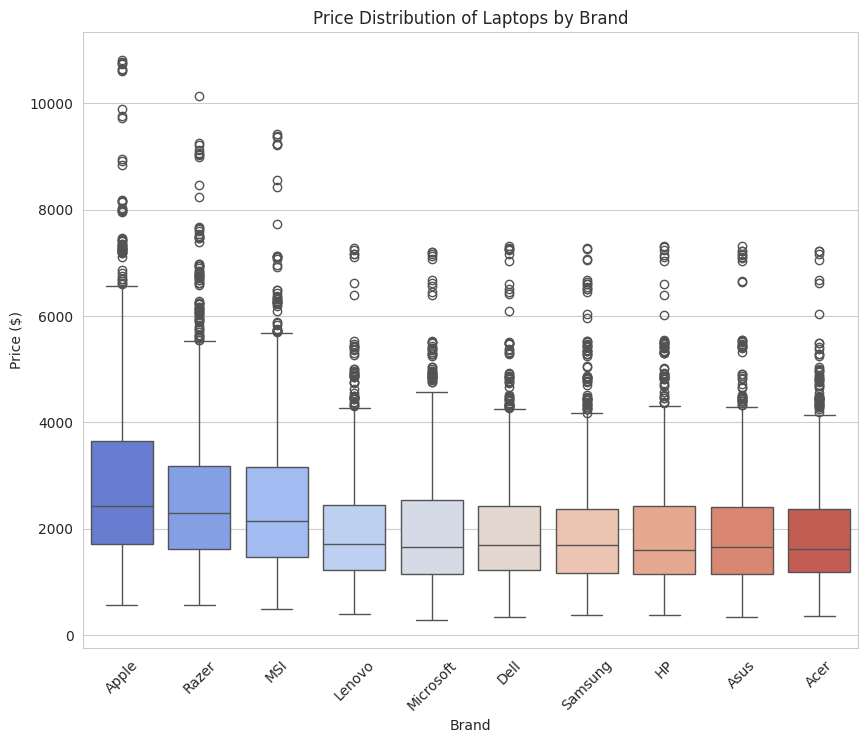

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.boxplot(x=df["Brand"],y=df['Price ($)'], order=df.groupby("Brand")["Price ($)"].mean().sort_values(ascending=False).index,palette="coolwarm")
plt.xlabel("Brand")
plt.ylabel("Price ($)")
plt.title("Price Distribution of Laptops by Brand")
plt.xticks(rotation=45)
plt.show()